<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc">
    <ul class="toc-item">
        <li><span><a href="#Deep-Learning-in-Python" data-toc-modified-id="Deep-Learning-in-Python-1">Deep Learning in Python</a></span>
            <ul class="toc-item"><li><span><a href="#CycleGAN-Monet-Paintings" data-toc-modified-id="#CycleGAN-Monet-Paintings-1.1">CycleGAN Monet Paintings</a></span>
                <ul class="toc-item"><li><span><a href="#Kothandaraman-Sikamani
" data-toc-modified-id="Kothandaraman-Sikamani-1.1.1"><a href="http://www.ipowersoft.com" rel="nofollow" target="_blank">Kothandaraman Sikamani</a></a></span>
                    </li></ul>
                </li>
            </ul>
        </li>
        <li><span><a href="#We'll-cover-below-aspects-during-this-analysis:" data-toc-modified-id="We'll-cover-below-aspects-during-this-analysis:-2">We'll cover below aspects during this analysis:</a></span></li>
        <li><span><a href="#Import-Libraries" data-toc-modified-id="Import-Libraries-3">Import Libraries</a></span></li>
        <li><span><a href="#Loading-data" data-toc-modified-id="Loading-data-4">Loading data</a></span>
        <li><span><a href="#1.-EDA(Exploratory-Data-Analysis)" data-toc-modified-id="1.-EDA(Exploratory-Data-Analysis)-5">1. EDA(Exploratory Data Analysis)</a></span></li>
        <li><span><a href="#2.-Monet-paintings" data-toc-modified-id="2.-Monet-paintings-6">2. Monet paintings</a></span>
        <ul class="toc-item">
                <li><span><a href="#2.1-Photo-samples" >2.1 Photo samples</a></span></li>
            </ul>
        </li>
        <li><span><a href="#3.-Model/Architecture" data-toc-modified-id="3.-Model/Architecture-7">3. Model/Architecture</a></span>
        <ul class="toc-item">
                <li><span><a href="#3.1-Generator-model" >3.1 Generator model</a></span></li>
                <li><span><a href="#3.2-Discriminator-model" >3.2 Discriminator model</a></span></li>
                <li><span><a href="#3.3-Build-model-(CycleGAN)" >3.3 Build model (CycleGAN)</a></span></li>
            </ul>
        </li>
        <li><span><a href="#4.-Loss-functions" data-toc-modified-id="4.-Loss-functions-8">4. Loss functions</a></span></li>
        <li><span><a href="#5.-Train" data-toc-modified-id="5.-Train-9">5. Train</a></span></li>
        <li><span><a href="#6.-Visualizations" data-toc-modified-id="6.-Visualizations-10">6. Visualizations</a></span></li>
        <li><span><a href="#7.-Results-&-Analysis" data-toc-modified-id="7.-Results-&-Analysis-11">7. Results & Analysis</a></span></li>
        <li><span><a href="#Conclusion/Summary" data-toc-modified-id="Conclusion/Summary-12">Conclusion/Summary</a></span></li>
    </ul>
</div>

<div class="alert alert-block alert-success">
    <h1 align="center">Deep Learning in Python</h1>
    <h2 align="center">CycleGAN Monet Paintings</h3>
    <h3 align="center"><a href="http://www.ipowersoft.com">Kothandaraman Sikamani</a></h5>
</div>

## Introduction

CycleGAN has provided a powerful and intriguing framework for creating Monet-style paintings from ordinary photographs, opening up possibilities for artistic expression and generating visually appealing outputs that resemble the works of this famous Impressionist artist.  
The data can be obtained from the website at https://www.kaggle.com/competitions/gan-getting-started  

Here is the GitHub repo URL for the project work https://github.com/ipowersoft/dl-cyclegan-monet-paintings  

### What is CycleGAN?

From the authors:
> We present an approach for learning to translate an image from a source domain X to a target domain Y in the absence of paired examples. Our goal is to learn a mapping G: X → Y, such that the distribution of images from G(X) is indistinguishable from the distribution Y using an adversarial loss. Because this mapping is highly under-constrained, we couple it with an inverse mapping F: Y → X and introduce a cycle consistency loss to push F(G(X)) ≈ X (and vice versa).

In essence it maps and image to a given domaind, if you are turning horses into zebra the image will be the horse and the domain is the zebras, in our case the photos are the image and the domain are the Monet paintings.  

#### Turning photos into Monet paintings (our task)
![](https://raw.githubusercontent.com/ipowersoft/dl-cyclegan-monet-paintings/main/images/painting_photo.png)




# We'll cover below aspects during this analysis:

- Import Library
- Load Data
- EDA(Exploratory Data Analysis)
- Monet paintings
- Model/Architecture
- Loss functions
- Train
- Visualizations
- Results & Analysis
- Conclusion/Summary

### Let's get to the code

In [1]:
!pip install seaborn

# Import Libraries

- NumPy (import numpy as np): NumPy is a library for working with arrays and matrices in Python. It provides various mathematical functions and operations that make it easier to work with numerical data. In this code, NumPy is being imported with the alias np, which makes it easier to refer to the library throughout the code.  


- Pandas (import pandas as pd): Pandas is a library for working with tabular data in Python. It provides a variety of tools for data manipulation, analysis, and visualization. In this code, Pandas is being imported with the alias pd, which makes it easier to refer to the library throughout the code.  


- Matplotlib (import matplotlib.pyplot as plt): Matplotlib is a library for creating data visualizations in Python. It provides various functions and tools for creating plots, charts, and graphs. In this code, the pyplot submodule of Matplotlib is being imported with the alias plt, which makes it easier to refer to the library throughout the code.  

And other list of libraries are,   
- os, random, json, PIL, shutil, re  
- KaggleDatasets     
- seaborn  
- tensorflow  
- tensorflow_hub
- Model, losses, optimizers  

In [2]:
import os, random, json, PIL, shutil, re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kaggle_datasets import KaggleDatasets
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow_addons as tfa
from tensorflow.keras import Model, losses, optimizers

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [3]:
import os, random, json, PIL, shutil, re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from kaggle_datasets import KaggleDatasets
import tensorflow as tf
import tensorflow.keras.layers as L
import tensorflow_addons as tfa
from tensorflow.keras import Model, losses, optimizers

### TPU configuration

In [4]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    print(f'Running on TPU {tpu.master()}')
except (ValueError, tf.errors.NotFoundError):
    strategy = tf.distribute.get_strategy()

REPLICAS = strategy.num_replicas_in_sync
print(f'REPLICAS: {REPLICAS}')
AUTO = tf.data.AUTOTUNE

REPLICAS: 1


### Model parameters

In [5]:
HEIGHT = 256
WIDTH = 256
CHANNELS = 3
EPOCHS = 50
BATCH_SIZE = 1

# Loading data

In [6]:
GCS_PATH = KaggleDatasets().get_gcs_path('gan-getting-started')

MONET_FILENAMES = tf.io.gfile.glob(str(GCS_PATH + '/monet_tfrec/*.tfrec'))
PHOTO_FILENAMES = tf.io.gfile.glob(str(GCS_PATH + '/photo_tfrec/*.tfrec'))

def count_data_items(filenames):
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

n_monet_samples = count_data_items(MONET_FILENAMES)
n_photo_samples = count_data_items(PHOTO_FILENAMES)

print(f'Monet TFRecord files: {len(MONET_FILENAMES)}')
print(f'Monet image files: {n_monet_samples}')
print(f'Photo TFRecord files: {len(PHOTO_FILENAMES)}')
print(f'Photo image files: {n_photo_samples}')

Monet TFRecord files: 5
Monet image files: 300
Photo TFRecord files: 20
Photo image files: 7038


# 1. EDA(Exploratory Data Analysis)

Analyzing and summarizing data sets to understand the main characteristics, patterns, and relationships. Identifying and handling data errors, inconsistencies, and outliers. This involves removing or correcting erroneous data points to ensure data quality.

### Auxiliar functions

In [7]:
def decode_image(image):
    image = tf.image.decode_jpeg(image, channels=CHANNELS)
    image = (tf.cast(image, tf.float32) / 127.5) - 1
    image = tf.reshape(image, [HEIGHT, WIDTH, CHANNELS])
    return image

def read_tfrecord(example):
    tfrecord_format = {
        'image_name': tf.io.FixedLenFeature([], tf.string),
        'image':      tf.io.FixedLenFeature([], tf.string),
        'target':     tf.io.FixedLenFeature([], tf.string)
    }
    example = tf.io.parse_single_example(example, tfrecord_format)
    image = decode_image(example['image'])
    return image

def load_dataset(filenames):
    dataset = tf.data.TFRecordDataset(filenames)
    dataset = dataset.map(read_tfrecord, num_parallel_calls=AUTO)
    return dataset

def get_gan_dataset(monet_files, photo_files, augment=None, repeat=True, shuffle=True, batch_size=1):

    monet_ds = load_dataset(monet_files)
    photo_ds = load_dataset(photo_files)

    if repeat:
        monet_ds = monet_ds.repeat()
        photo_ds = photo_ds.repeat()
    if shuffle:
        monet_ds = monet_ds.shuffle(2048)
        photo_ds = photo_ds.shuffle(2048)
        
    monet_ds = monet_ds.batch(batch_size, drop_remainder=True)
    photo_ds = photo_ds.batch(batch_size, drop_remainder=True)
    monet_ds = monet_ds.cache()
    photo_ds = photo_ds.cache()
    monet_ds = monet_ds.prefetch(AUTO)
    photo_ds = photo_ds.prefetch(AUTO)
    
    gan_ds = tf.data.Dataset.zip((monet_ds, photo_ds))
    
    return gan_ds

def display_samples(ds, row, col):
    ds_iter = iter(ds)
    plt.figure(figsize=(15, int(15*row/col)))
    for j in range(row*col):
        example_sample = next(ds_iter)
        plt.subplot(row,col,j+1)
        plt.axis('off')
        plt.imshow(example_sample[0] * 0.5 + 0.5)
    plt.show()
        
def display_generated_samples(ds, model, n_samples):
    ds_iter = iter(ds)
    for n_sample in range(n_samples):
        example_sample = next(ds_iter)
        generated_sample = model.predict(example_sample)
        
        plt.subplot(121)
        plt.title("input image")
        plt.imshow(example_sample[0] * 0.5 + 0.5)
        plt.axis('off')
        
        plt.subplot(122)
        plt.title("Generated image")
        plt.imshow(generated_sample[0] * 0.5 + 0.5)
        plt.axis('off')
        plt.show()
        
def predict_and_save(input_ds, generator_model, output_path):
    i = 1
    for img in input_ds:
        prediction = generator_model(img, training=False)[0].numpy() # make predition
        prediction = (prediction * 127.5 + 127.5).astype(np.uint8)   # re-scale
        im = PIL.Image.fromarray(prediction)
        im.save(f'{output_path}{str(i)}.jpg')
        i += 1
                

# Model functions
def downsample(filters, size, apply_instancenorm=True, strides=2):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = tf.keras.Sequential()
    result.add(L.Conv2D(filters, size, strides=strides, padding='same',
                        kernel_initializer=initializer, use_bias=False))

    if apply_instancenorm:
        result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    result.add(L.LeakyReLU())

    return result

def upsample(filters, size, apply_dropout=False, strides=2):
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    result = tf.keras.Sequential()
    result.add(L.Conv2DTranspose(filters, size, strides=strides, padding='same',
                                 kernel_initializer=initializer, use_bias=False))

    result.add(tfa.layers.InstanceNormalization(gamma_initializer=gamma_init))

    if apply_dropout:
        result.add(L.Dropout(0.5))

    result.add(L.ReLU())

    return result

# 2. Monet paintings

Here are some sample images from the Monet Paintings.

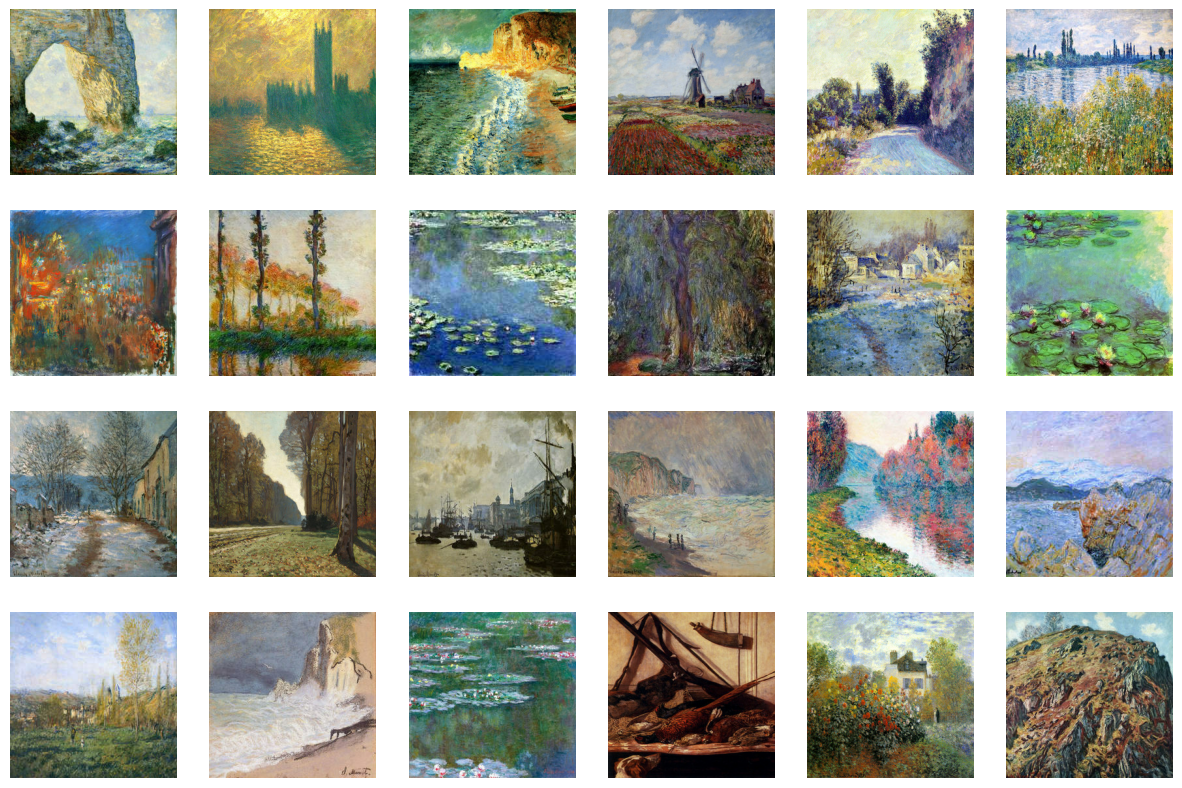

In [8]:
display_samples(load_dataset(MONET_FILENAMES).batch(1), 4, 6)

### 2.1 Photo samples

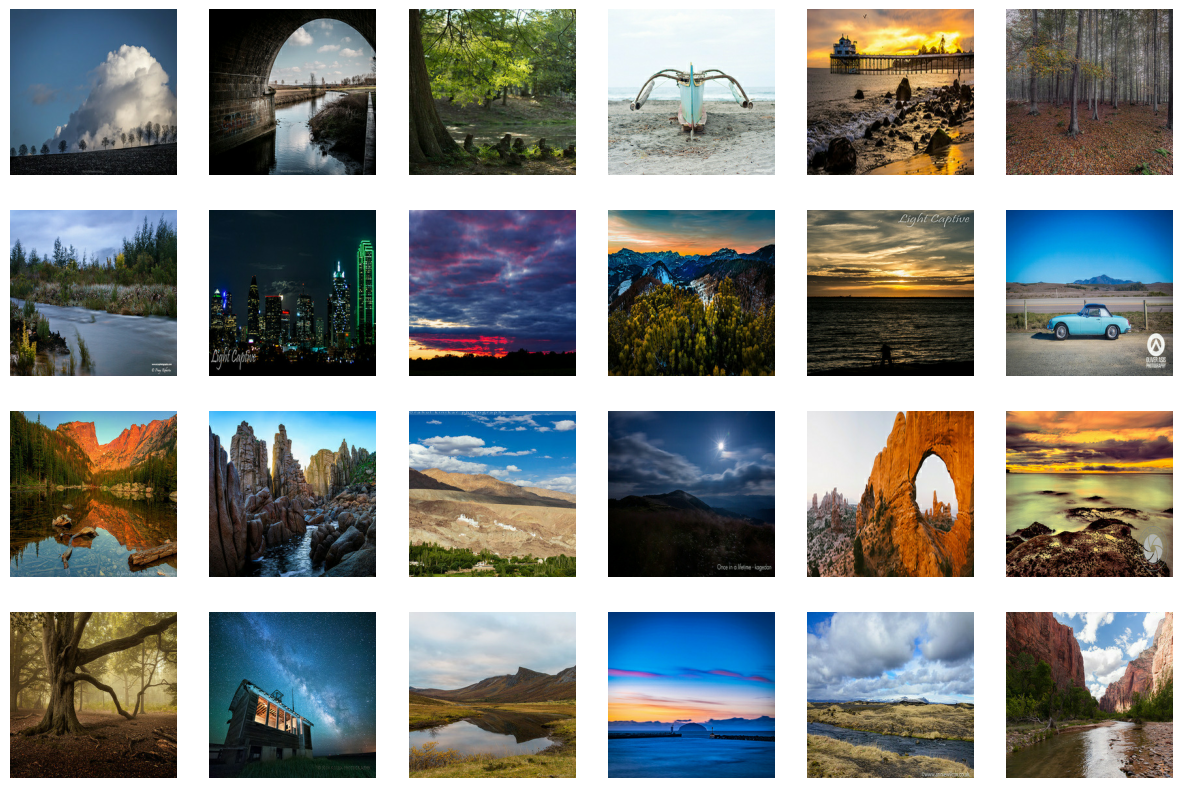

In [9]:
display_samples(load_dataset(PHOTO_FILENAMES).batch(1), 4, 6)

# 3. Model/Architecture

An appropriate model or algorithm based on the problem.   
Initializing the model with some initial parameter values. The initial values may be random or based on prior knowledge, depending on the algorithm.  
The different models involved here is Generator model, Discriminator model and Build model (CycleGAN)

## 3.1 Generator model

In [10]:
OUTPUT_CHANNELS = 3

def generator():
    inputs = L.Input(shape=[HEIGHT, WIDTH, CHANNELS])

    down_stack = [
        downsample(64, 4, apply_instancenorm=False), # (bs, 128, 128, 64)
        downsample(128, 4),                          # (bs, 64, 64, 128)
        downsample(256, 4),                          # (bs, 32, 32, 256)
        downsample(512, 4),                          # (bs, 16, 16, 512)
        downsample(512, 4),                          # (bs, 8, 8, 512)
        downsample(512, 4),                          # (bs, 4, 4, 512)
        downsample(512, 4),                          # (bs, 2, 2, 512)
        downsample(512, 4),                          # (bs, 1, 1, 512)
    ]

    up_stack = [
        upsample(512, 4, apply_dropout=True), # (bs, 2, 2, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 4, 4, 1024)
        upsample(512, 4, apply_dropout=True), # (bs, 8, 8, 1024)
        upsample(512, 4),                     # (bs, 16, 16, 1024)
        upsample(256, 4),                     # (bs, 32, 32, 512)
        upsample(128, 4),                     # (bs, 64, 64, 256)
        upsample(64, 4),                      # (bs, 128, 128, 128)
    ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = L.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                             strides=2,
                             padding='same',
                             kernel_initializer=initializer,
                             activation='tanh') # (bs, 256, 256, 3)

    x = inputs

    # Downsampling through the model
    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    # Upsampling and establishing the skip connections
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = L.Concatenate()([x, skip])

    x = last(x)

    return Model(inputs=inputs, outputs=x)

## 3.2 Discriminator model

In [11]:
def discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)
    gamma_init = tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

    inp = L.Input(shape=[HEIGHT, WIDTH, CHANNELS], name='input_image')

    x = inp

    x = downsample(64, 4, False)(x)  # (bs, 128, 128, 64)
    x = downsample(128, 4)(x)  # (bs, 64, 64, 128)
    x = downsample(256, 4)(x)  # (bs, 32, 32, 256)

    x = L.ZeroPadding2D()(x)  # (bs, 34, 34, 256)
    x = L.Conv2D(512, 4, strides=1,
                 kernel_initializer=initializer,
                 use_bias=False)(x)  # (bs, 31, 31, 512)

    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_init)(x)
    x = L.LeakyReLU()(x)
    x = L.ZeroPadding2D()(x)  # (bs, 33, 33, 512)
    x = L.Conv2D(1, 4, strides=1,
                 kernel_initializer=initializer)(x)  # (bs, 30, 30, 1)

    return Model(inputs=inp, outputs=x)

## 3.3 Build model (CycleGAN)

In [12]:
with strategy.scope():
    monet_generator = generator() # transforms photos to Monet-esque paintings
    photo_generator = generator() # transforms Monet paintings to be more like photos

    monet_discriminator = discriminator() # differentiates real Monet paintings and generated Monet paintings
    photo_discriminator = discriminator() # differentiates real photos and generated photos


class CycleGan(Model):
    def __init__(
        self,
        monet_generator,
        photo_generator,
        monet_discriminator,
        photo_discriminator,
        lambda_cycle=10,
    ):
        super(CycleGan, self).__init__()
        self.m_gen = monet_generator
        self.p_gen = photo_generator
        self.m_disc = monet_discriminator
        self.p_disc = photo_discriminator
        self.lambda_cycle = lambda_cycle
        
    def compile(
        self,
        m_gen_optimizer,
        p_gen_optimizer,
        m_disc_optimizer,
        p_disc_optimizer,
        gen_loss_fn,
        disc_loss_fn,
        cycle_loss_fn,
        identity_loss_fn
    ):
        super(CycleGan, self).compile()
        self.m_gen_optimizer = m_gen_optimizer
        self.p_gen_optimizer = p_gen_optimizer
        self.m_disc_optimizer = m_disc_optimizer
        self.p_disc_optimizer = p_disc_optimizer
        self.gen_loss_fn = gen_loss_fn
        self.disc_loss_fn = disc_loss_fn
        self.cycle_loss_fn = cycle_loss_fn
        self.identity_loss_fn = identity_loss_fn
        
    def train_step(self, batch_data):
        real_monet, real_photo = batch_data
        
        with tf.GradientTape(persistent=True) as tape:
            # photo to monet back to photo
            fake_monet = self.m_gen(real_photo, training=True)
            cycled_photo = self.p_gen(fake_monet, training=True)

            # monet to photo back to monet
            fake_photo = self.p_gen(real_monet, training=True)
            cycled_monet = self.m_gen(fake_photo, training=True)

            # generating itself
            same_monet = self.m_gen(real_monet, training=True)
            same_photo = self.p_gen(real_photo, training=True)

            # discriminator used to check, inputing real images
            disc_real_monet = self.m_disc(real_monet, training=True)
            disc_real_photo = self.p_disc(real_photo, training=True)

            # discriminator used to check, inputing fake images
            disc_fake_monet = self.m_disc(fake_monet, training=True)
            disc_fake_photo = self.p_disc(fake_photo, training=True)

            # evaluates generator loss
            monet_gen_loss = self.gen_loss_fn(disc_fake_monet)
            photo_gen_loss = self.gen_loss_fn(disc_fake_photo)

            # evaluates total cycle consistency loss
            total_cycle_loss = self.cycle_loss_fn(real_monet, cycled_monet, self.lambda_cycle) + self.cycle_loss_fn(real_photo, cycled_photo, self.lambda_cycle)

            # evaluates total generator loss
            total_monet_gen_loss = monet_gen_loss + total_cycle_loss + self.identity_loss_fn(real_monet, same_monet, self.lambda_cycle)
            total_photo_gen_loss = photo_gen_loss + total_cycle_loss + self.identity_loss_fn(real_photo, same_photo, self.lambda_cycle)

            # evaluates discriminator loss
            monet_disc_loss = self.disc_loss_fn(disc_real_monet, disc_fake_monet)
            photo_disc_loss = self.disc_loss_fn(disc_real_photo, disc_fake_photo)

        # Calculate the gradients for generator and discriminator
        monet_generator_gradients = tape.gradient(total_monet_gen_loss,
                                                  self.m_gen.trainable_variables)
        photo_generator_gradients = tape.gradient(total_photo_gen_loss,
                                                  self.p_gen.trainable_variables)

        monet_discriminator_gradients = tape.gradient(monet_disc_loss,
                                                      self.m_disc.trainable_variables)
        photo_discriminator_gradients = tape.gradient(photo_disc_loss,
                                                      self.p_disc.trainable_variables)

        # Apply the gradients to the optimizer
        self.m_gen_optimizer.apply_gradients(zip(monet_generator_gradients,
                                                 self.m_gen.trainable_variables))

        self.p_gen_optimizer.apply_gradients(zip(photo_generator_gradients,
                                                 self.p_gen.trainable_variables))

        self.m_disc_optimizer.apply_gradients(zip(monet_discriminator_gradients,
                                                  self.m_disc.trainable_variables))

        self.p_disc_optimizer.apply_gradients(zip(photo_discriminator_gradients,
                                                  self.p_disc.trainable_variables))
        
        return {
            'monet_gen_loss': total_monet_gen_loss,
            'photo_gen_loss': total_photo_gen_loss,
            'monet_disc_loss': monet_disc_loss,
            'photo_disc_loss': photo_disc_loss
        }

# 4. Loss functions

The loss function measures the discrepancy between the predicted outputs and the actual labels. The goal is to minimize this loss by finding the optimal values for the model's parameters. This process involves adjusting the parameter values through multiple iterations or epochs.

In [13]:
with strategy.scope():
    # Discriminator loss {0: fake, 1: real} (The discriminator loss outputs the average of the real and generated loss)
    def discriminator_loss(real, generated):
        real_loss = losses.BinaryCrossentropy(from_logits=True, reduction=losses.Reduction.NONE)(tf.ones_like(real), real)

        generated_loss = losses.BinaryCrossentropy(from_logits=True, reduction=losses.Reduction.NONE)(tf.zeros_like(generated), generated)

        total_disc_loss = real_loss + generated_loss

        return total_disc_loss * 0.5
    
    # Generator loss
    def generator_loss(generated):
        return losses.BinaryCrossentropy(from_logits=True, reduction=losses.Reduction.NONE)(tf.ones_like(generated), generated)
    
    
    # Cycle consistency loss (measures if original photo and the twice transformed photo to be similar to one another)
    with strategy.scope():
        def calc_cycle_loss(real_image, cycled_image, LAMBDA):
            loss1 = tf.reduce_mean(tf.abs(real_image - cycled_image))

            return LAMBDA * loss1

    # Identity loss (compares the image with its generator (i.e. photo with photo generator))
    with strategy.scope():
        def identity_loss(real_image, same_image, LAMBDA):
            loss = tf.reduce_mean(tf.abs(real_image - same_image))
            return LAMBDA * 0.5 * loss

In [14]:
import numpy as np
from tensorflow.keras.callbacks import EarlyStopping

class CustomEarlyStopping(EarlyStopping):
    def __init__(self, monitor_loss='loss', min_delta=0, patience=0, verbose=0):
        super().__init__(monitor=monitor_loss, min_delta=min_delta, patience=patience, verbose=verbose)

    def on_epoch_end(self, epoch, logs=None):
        current_loss = logs.get(self.monitor)
        if current_loss is None:
            warnings.warn(f'Early stopping conditioned on metric `{self.monitor}` '
                          f'which is not available. Available metrics are: {",".join(list(logs.keys()))}',
                          RuntimeWarning)
            return

        if np.greater(current_loss - self.min_delta, self.best).all():
            self.best = current_loss
            self.wait = 0
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print(f'Early stopping triggered at epoch {epoch} due to loss {self.monitor}.')

# Example usage
early_stopping = CustomEarlyStopping(monitor_loss='monet_disc_loss', patience = 20, min_delta=0.001)


# 5. Train

The process of building a model or algorithm using a labeled dataset to learn patterns, relationships, or rules that can be used to make predictions or classify new, unseen data.  

The model iteratively adjusts its parameters to minimize the difference between the predicted outputs and the actual labels in the training data. This is often done using optimization algorithms, such as gradient descent, which update the model parameters based on the gradients of the loss function.

In [15]:
from tensorflow.keras.callbacks import EarlyStopping

with strategy.scope():
    monet_generator_optimizer = optimizers.Adam(2e-4, beta_1=0.5)
    photo_generator_optimizer = optimizers.Adam(2e-4, beta_1=0.5)
    monet_discriminator_optimizer = optimizers.Adam(2e-4, beta_1=0.5)
    photo_discriminator_optimizer = optimizers.Adam(2e-4, beta_1=0.5)
    
    gan_model = CycleGan(monet_generator, photo_generator, 
                         monet_discriminator, photo_discriminator)

    gan_model.compile(m_gen_optimizer=monet_generator_optimizer,
                      p_gen_optimizer=photo_generator_optimizer,
                      m_disc_optimizer=monet_discriminator_optimizer,
                      p_disc_optimizer=photo_discriminator_optimizer,
                      gen_loss_fn=generator_loss,
                      disc_loss_fn=discriminator_loss,
                      cycle_loss_fn=calc_cycle_loss,
                      identity_loss_fn=identity_loss)
    
    history = gan_model.fit(get_gan_dataset(MONET_FILENAMES, PHOTO_FILENAMES, batch_size=BATCH_SIZE), 
                            steps_per_epoch=(n_monet_samples//BATCH_SIZE),
                            epochs=7,
                            verbose=2,
                            callbacks=[early_stopping]).history


Epoch 1/7


2023-07-21 14:25:10.929086: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inmodel/sequential_8/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


300/300 - 141s - monet_gen_loss: 4.6436 - photo_gen_loss: 5.5755 - monet_disc_loss: 0.6741 - photo_disc_loss: 0.6828 - 141s/epoch - 471ms/step
Epoch 2/7
300/300 - 68s - monet_gen_loss: 3.3097 - photo_gen_loss: 3.6535 - monet_disc_loss: 0.6921 - photo_disc_loss: 0.4352 - 68s/epoch - 228ms/step
Epoch 3/7
300/300 - 68s - monet_gen_loss: 4.7045 - photo_gen_loss: 4.6085 - monet_disc_loss: 0.7078 - photo_disc_loss: 0.4612 - 68s/epoch - 228ms/step
Epoch 4/7
300/300 - 68s - monet_gen_loss: 3.1090 - photo_gen_loss: 2.5412 - monet_disc_loss: 0.6559 - photo_disc_loss: 0.7472 - 68s/epoch - 228ms/step
Epoch 5/7
300/300 - 68s - monet_gen_loss: 3.1332 - photo_gen_loss: 3.8547 - monet_disc_loss: 0.4599 - photo_disc_loss: 0.7905 - 68s/epoch - 228ms/step
Epoch 6/7
300/300 - 68s - monet_gen_loss: 2.5619 - photo_gen_loss: 3.0829 - monet_disc_loss: 0.6883 - photo_disc_loss: 0.6457 - 68s/epoch - 228ms/step
Epoch 7/7
300/300 - 69s - monet_gen_loss: 2.5841 - photo_gen_loss: 2.5333 - monet_disc_loss: 0.7075 - 

# 6. Visualizations/Analysis

**Visualising predictions**  
Creating visual representations of the data using graphs, charts, and plots. This helps in identifying patterns, trends, outliers, and relationships between variables. The visualizations include histograms, box plots, scatter plots, bar charts, and heatmaps.

1/1 [==============================] - 1s 764ms/step


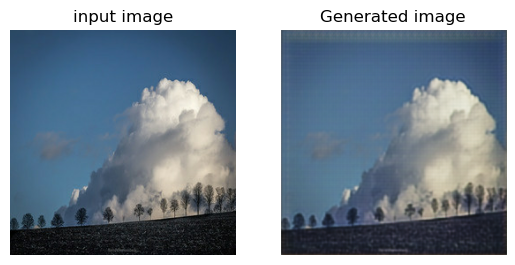

1/1 [==============================] - 0s 22ms/step


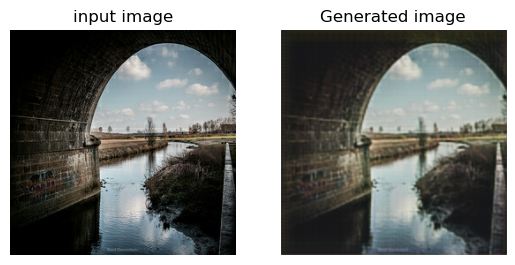

1/1 [==============================] - 0s 97ms/step


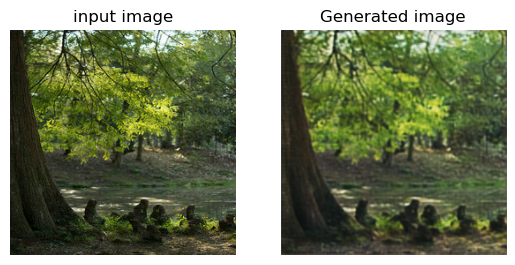

1/1 [==============================] - 0s 22ms/step


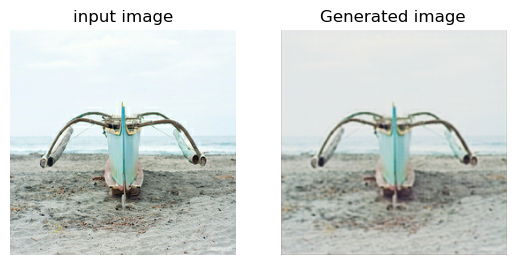

1/1 [==============================] - 0s 22ms/step


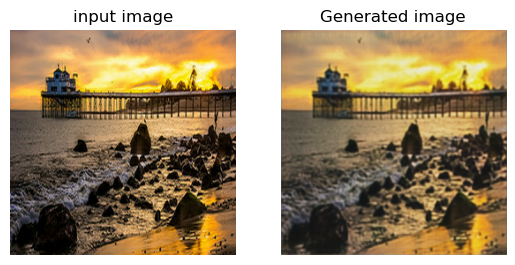

1/1 [==============================] - 0s 21ms/step


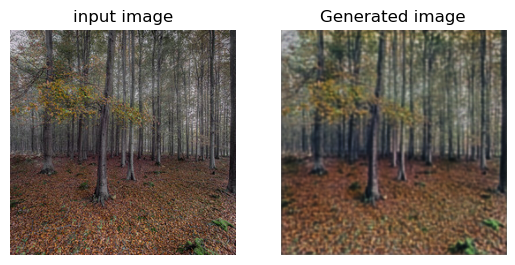

1/1 [==============================] - 0s 20ms/step


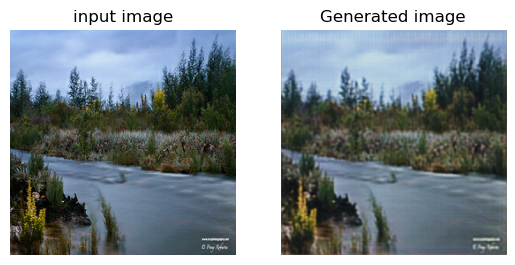

1/1 [==============================] - 0s 112ms/step


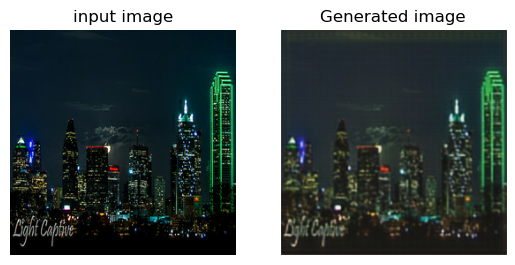

In [16]:
display_generated_samples(load_dataset(PHOTO_FILENAMES).batch(1), monet_generator, 8)

# 7. Results & Analysis



## Make predictions

In [17]:
os.makedirs('../images/') # Create folder to save generated images

predict_and_save(load_dataset(PHOTO_FILENAMES).batch(1), monet_generator, '../images/')

## Submission file

In [18]:
shutil.make_archive('/kaggle/working/images/', 'zip', '../images')

print(f"Generated samples: {len([name for name in os.listdir('../images/') if os.path.isfile(os.path.join('../images/', name))])}")

Generated samples: 7038


# Conclusion/Summary

In above visualization we can evaluate the quality of the generated images and how well the model is able to transform images.  
Here is the GitHub repo URL for the project work https://github.com/ipowersoft/dl-cyclegan-monet-paintings